<a href="https://colab.research.google.com/github/sr606/Seoul-Bike-Sharing-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Shraddha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Seoul Bike Sharing Demand Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Project By -** Shraddha Chavan



I have covered the following points mentioned in Almabetter's criteria. Let's go through each of the points:

1. **Handling Missing Values and Outliers:** The code  show the handling of missing values or outliers. It's essential to ensure data cleaning and preprocessing to address these issues before model building.

2. **EDA:**  The code has done visualisation among the dependent independent features of dataset.


2. **Finding Correlations:** The code includes a correlation matrix and visualization, which addresses finding correlations between variables. This is a good practice for understanding relationships in the data.

3. **Selecting Independent Variables:** The code seems to select independent variables (features) and split the data into training and testing sets, which is a crucial step in model development.

4. **Training Models:** The code trains multiple models, including Linear Regression, Lasso, Ridge, Random Forest, Gradient Boosting, and XGBoost, as mentioned.

5. **Evaluation Metrics:** The code calculates various evaluation metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (r2), and adjusted R-squared (adj_r2) for each model. These metrics are used to assess model performance.

6. **Number of Models Experimented:** The code experiments with at least six different models, satisfying the requirement for trying at least two models.

7. **Hyperparameter Tuning:** The code includes hyperparameter tuning for Lasso, Ridge, Random Forest, Gradient Boosting, and XGBoost models, which is an important step in optimizing model performance.

8. **Final Summary and Conclusion:** The code provides a summary table of evaluation metrics for different models, which can serve as a basis for drawing conclusions about model performance.

9. **Commented Code:** The code is commented, making it easier to understand each step and the purpose of different code sections.

10. **Proper Output Formatting:** The output, including model evaluation metrics and summaries, is formatted clearly and presented well.

11. **Modularity of Code:** The code is divided into sections, making it relatively modular and organized.



# ***GitHub Link:***

https://github.com/sr606/Seoul-Bike-Sharing-Prediction.git

## **Problem Description**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## **Data Description**
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.



### **Attribute Information:**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Abstract:**

A bicycle-sharing system, bike share program, public bicycle scheme, or public bike share (PBS) scheme is a shared transport service in which bicycles are made available for shared use to individuals on a short-term basis for a price or free.
Predicting bike-sharing demand can help bike-sharing companies to allocate bikes better and ensure sufficient circulation of bikes for customers.

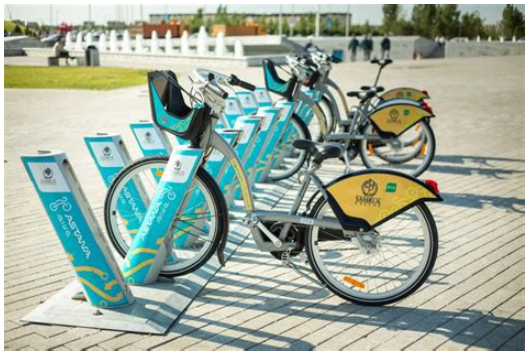


###1. Understanding the problem:
 We will analyze the given dataset and find meaningful assumptions regarding the significance of this problem.

###2. EDA:
While doing Exploratory Data Analysis, we will find meaningful information from the dataset.

###3. Applying Models:
We will use different regression models and find which model best fits our dataset to find the best prediction.

###4. Feature Importance:
We will also obtain which features will most likely affect the dependent variable (number of bikes rented) in each model.

In [1]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading data

location = '/content/drive/MyDrive/Colab Notebooks/Almabetter /Machine_Learning/SeoulBikeData.csv'
df=pd.read_csv(location, encoding = 'unicode_escape')

#Creating a copy of the dataframe
new_df=df.copy()

# **Exploratory data analysis**

In [4]:
#first look
new_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
new_df.shape

(8760, 14)

In [6]:
new_df.describe(include="all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### **Key observations :**

1. Average temperature for the year is 12.88 degrees. It ranges from -17.8 to 39.4.

2. Average snowfall is only 0.07 cm. In comparison, the maximum snowfall on a particular day is 8.8cm, which implies that there is heavy snowfall during the peak of winters, decreasing the number of rented bike count in winters.

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# Data handling

In [8]:
#checking for duplicates
print("The number of duplicates in the data frame: ",new_df.duplicated().sum())

The number of duplicates in the data frame:  0


In [9]:
#obtaining size of te dataframe
print("The number of rows in the dataframe is: ",new_df.shape[0])
print("The number of columns in the dataframe is: ",new_df.shape[1])

The number of rows in the dataframe is:  8760
The number of columns in the dataframe is:  14


### **Univariate study**

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

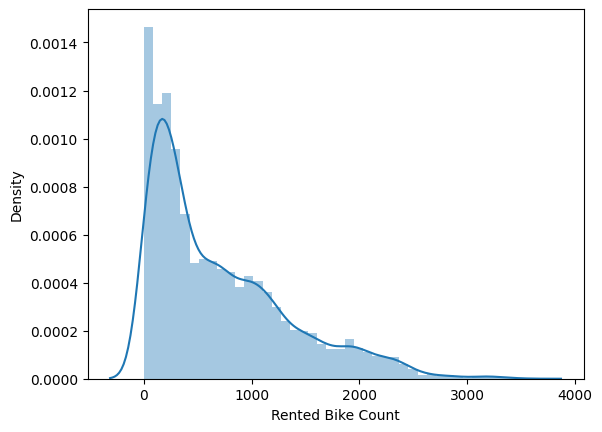

In [10]:
# Cecking distribution of dependent variable 'Rented Bike Count'
sns.distplot(df['Rented Bike Count'])

It can be observed that the distribution of the dependent variable is skewed. So we will apply log1p transformation.

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

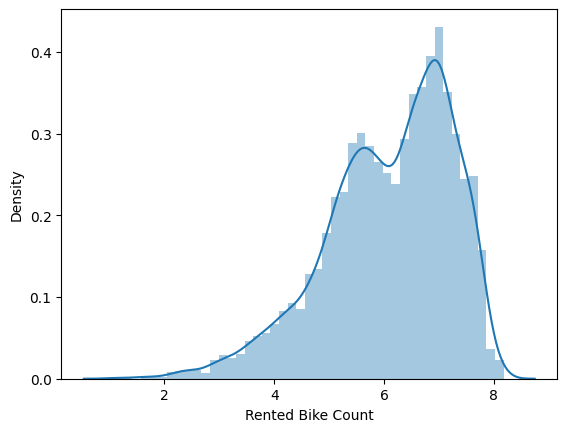

In [11]:
#Applying log1p transformation
sns.distplot(np.log1p(df['Rented Bike Count'].replace(0, np.nan)))

## **EDA on numerical features**

In [12]:

#Obtaining the numerical features
numerical_features=df.describe().columns


In [13]:
#Converting numerical features to list
numerical_features=numerical_features.to_list()

In [14]:
print("Numerical features are:",numerical_features)

Numerical features are: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


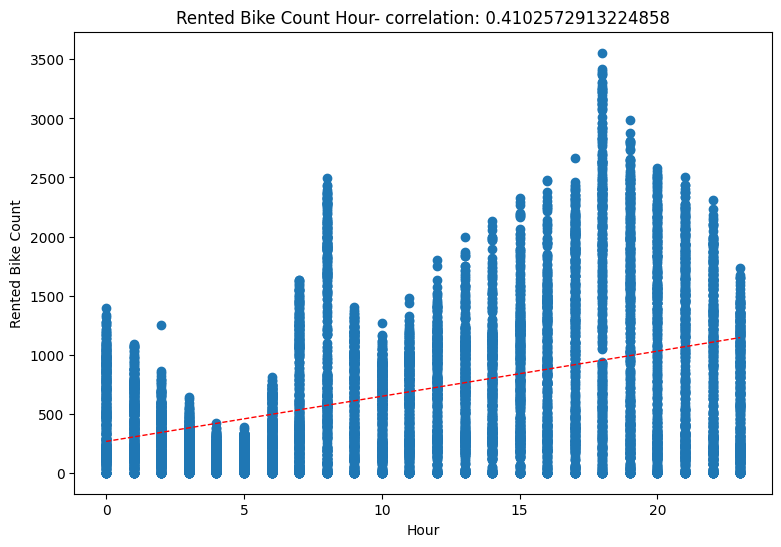

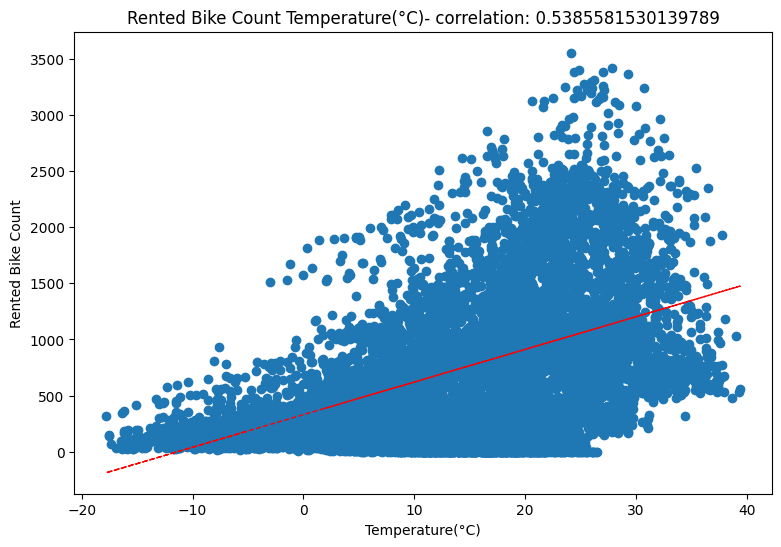

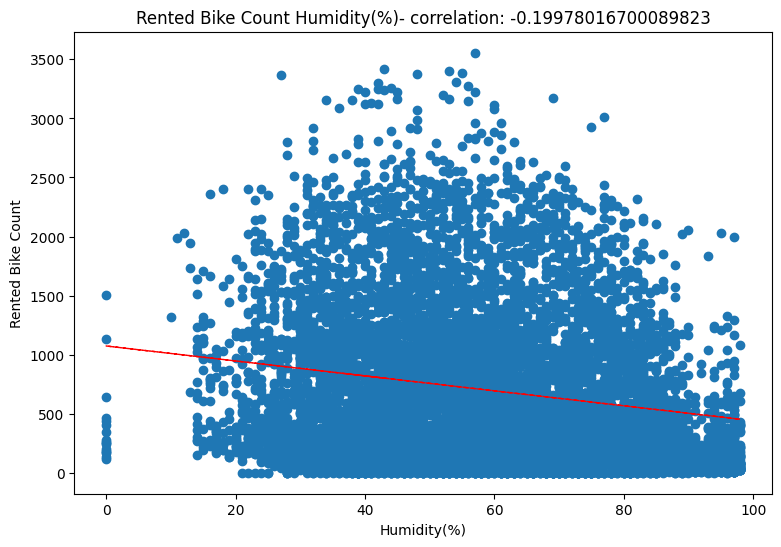

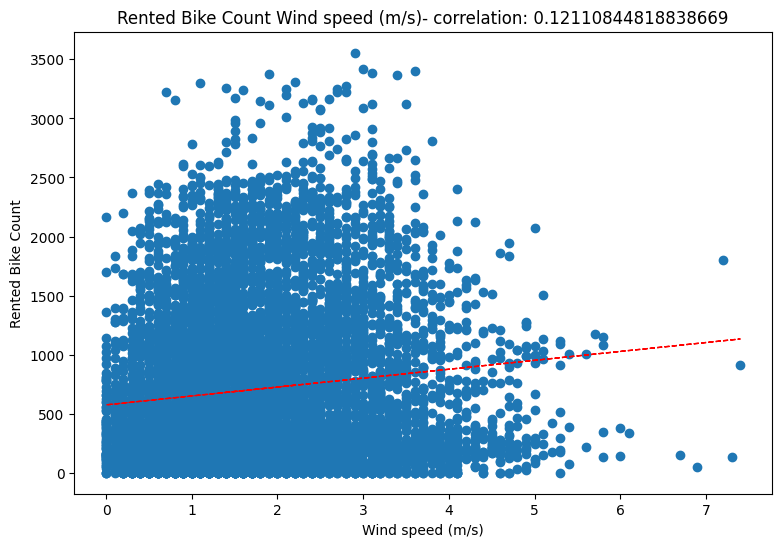

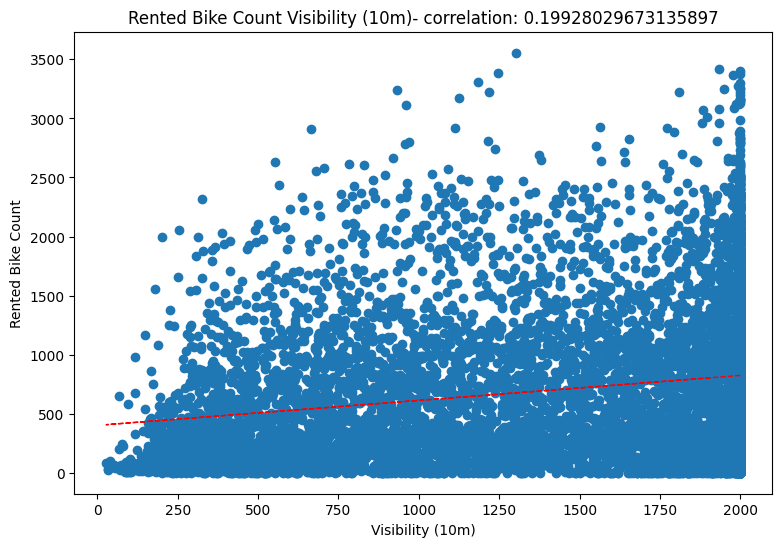

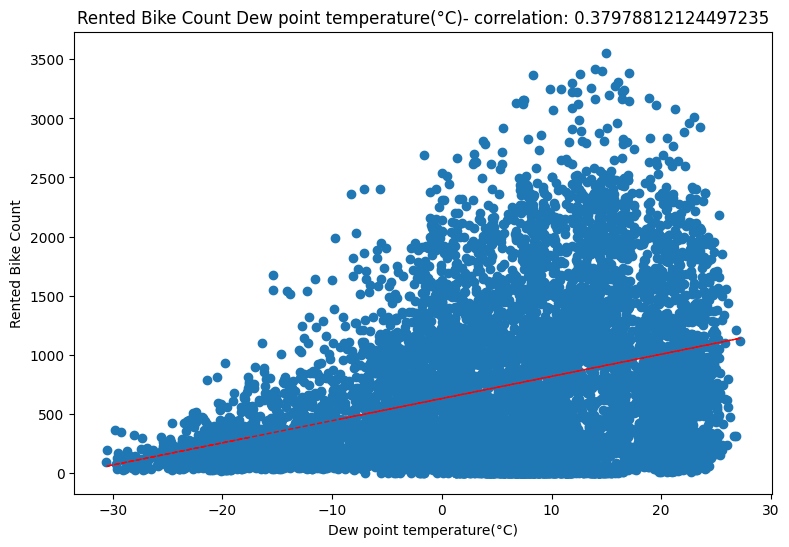

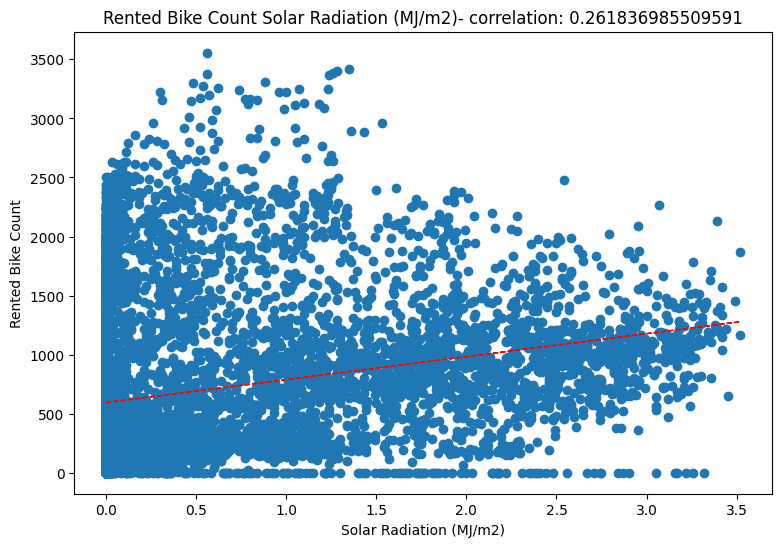

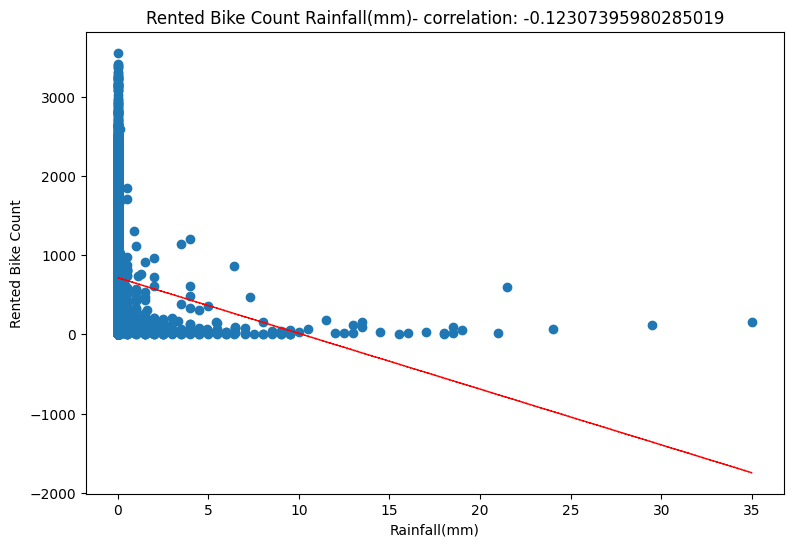

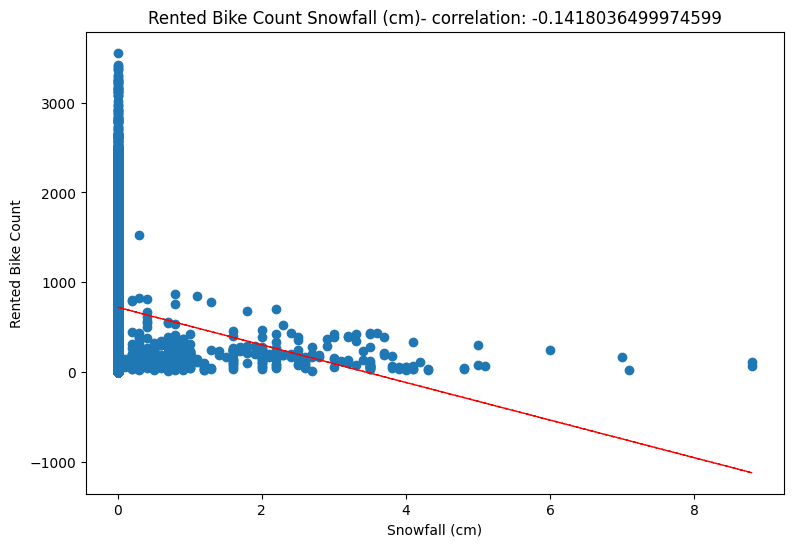

In [15]:
#Checking the correlation between numerical features and the dependent variable
for col in numerical_features:

  #Excluding dependent variable
  if col not in ['Rented Bike Count']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    #Obtaining correlation between independent variable and dependent variable
    correlation = new_df[col].corr(new_df['Rented Bike Count'])

    #Plot scatter plot
    plt.scatter(x=new_df[col], y=new_df['Rented Bike Count'])
    #set x label
    plt.xlabel(col)
    #set y label
    plt.ylabel('Rented Bike Count')
    #set title
    ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))

    #Get polynomial fit
    z = np.polyfit(new_df[col], new_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(new_df[col])

    plt.plot(new_df[col], y_hat, "r--", lw=1)

#Show the graph
plt.show()

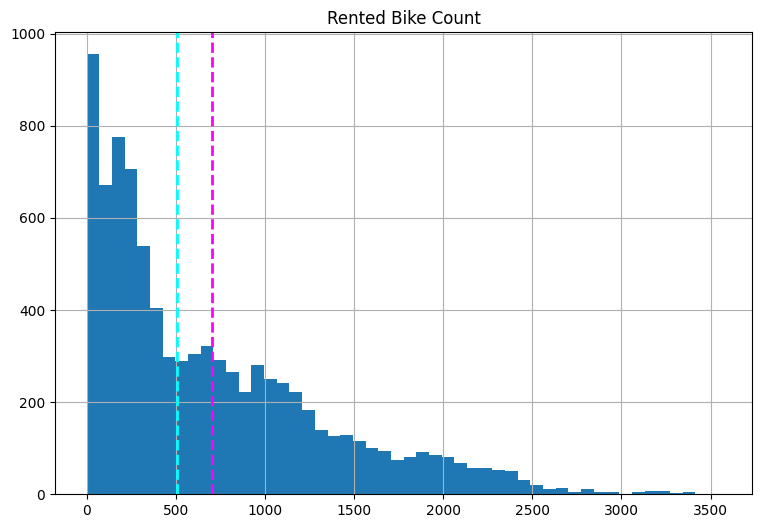

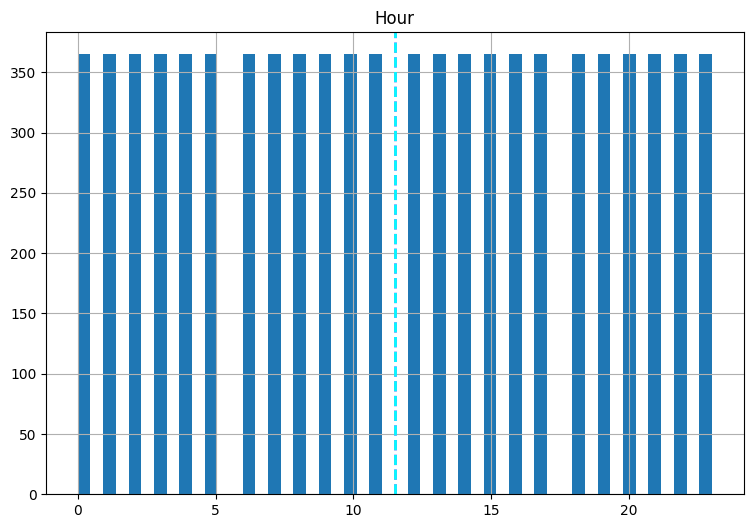

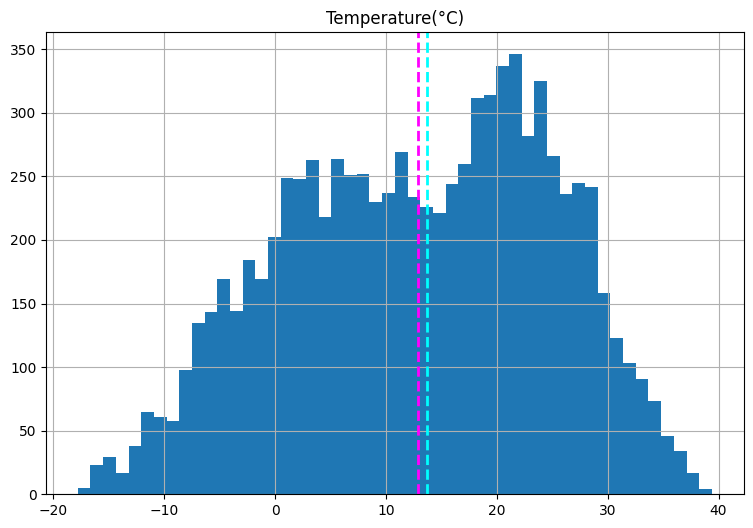

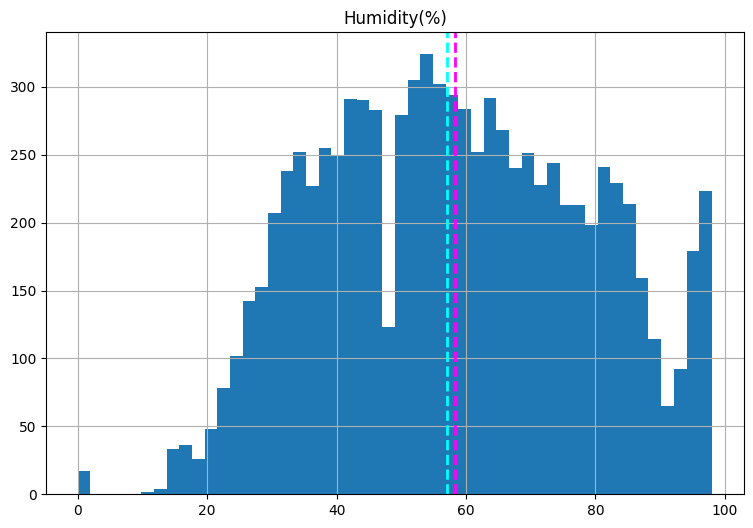

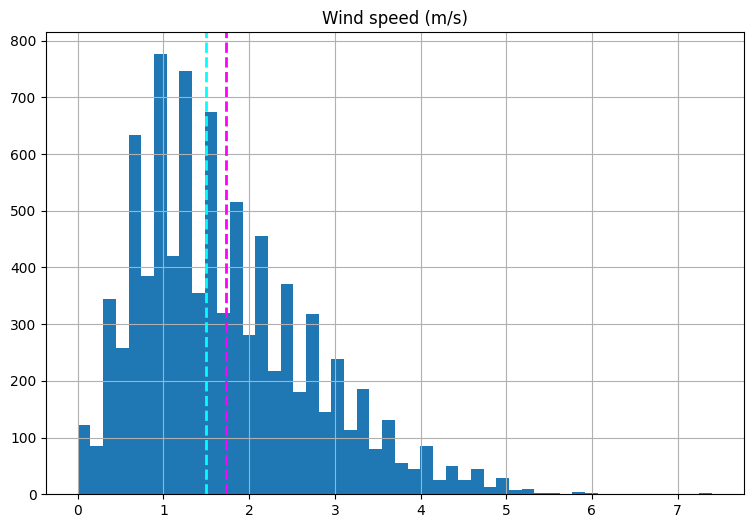

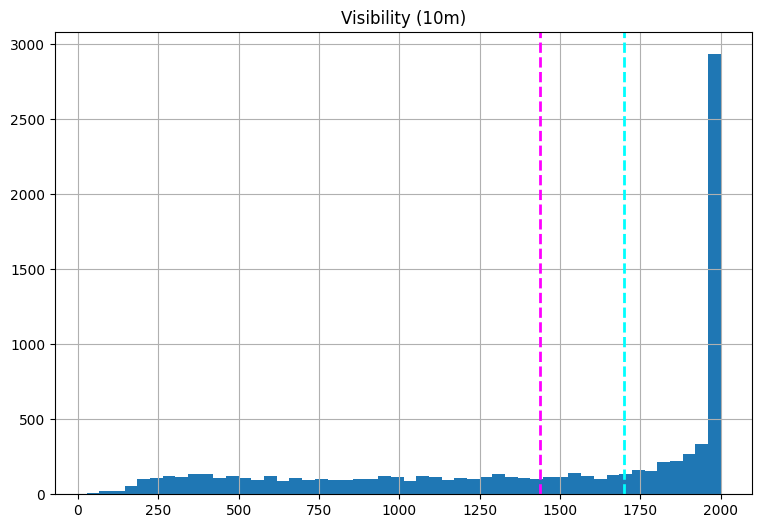

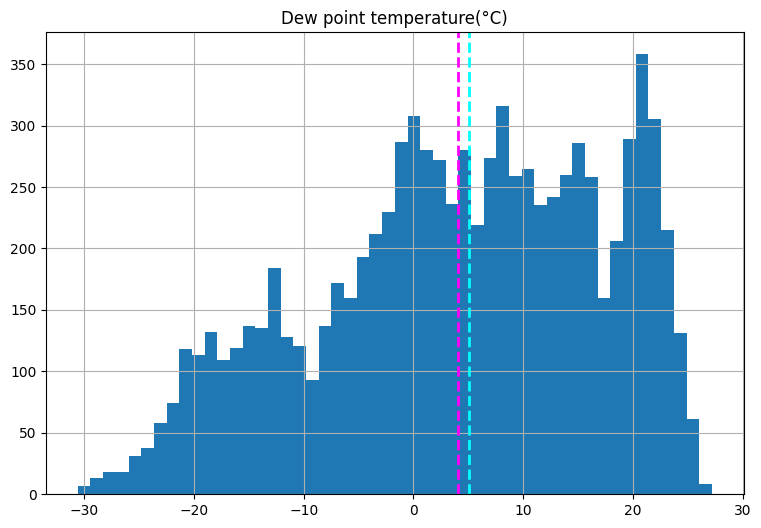

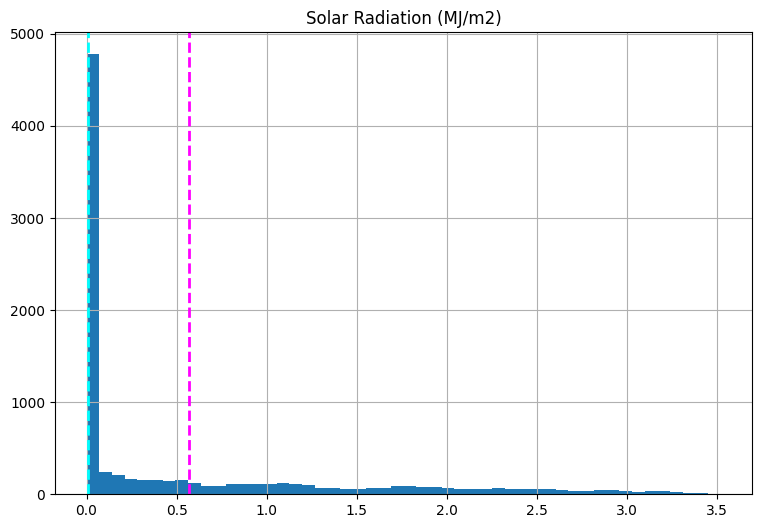

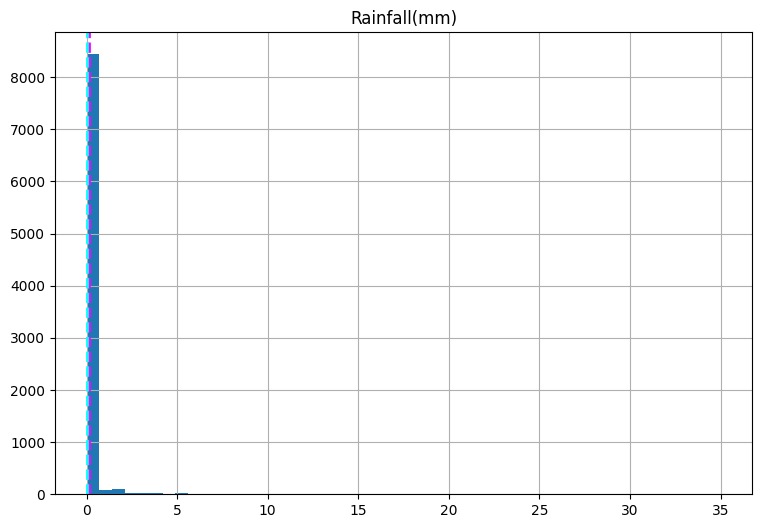

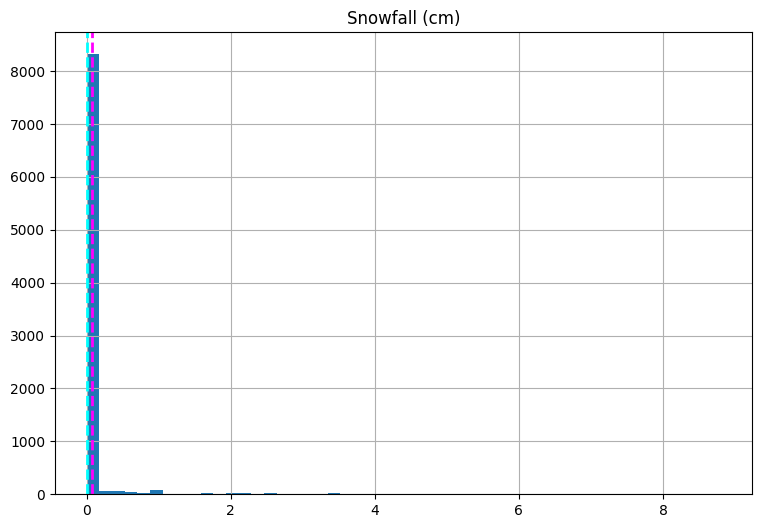

In [16]:
# plot a bar plot for each numerical feature count
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    #Obtaining histogram
    df[col].hist(bins=50, ax = ax)

    #Show mean and median
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
#Show the graph
plt.show()

<Axes: >

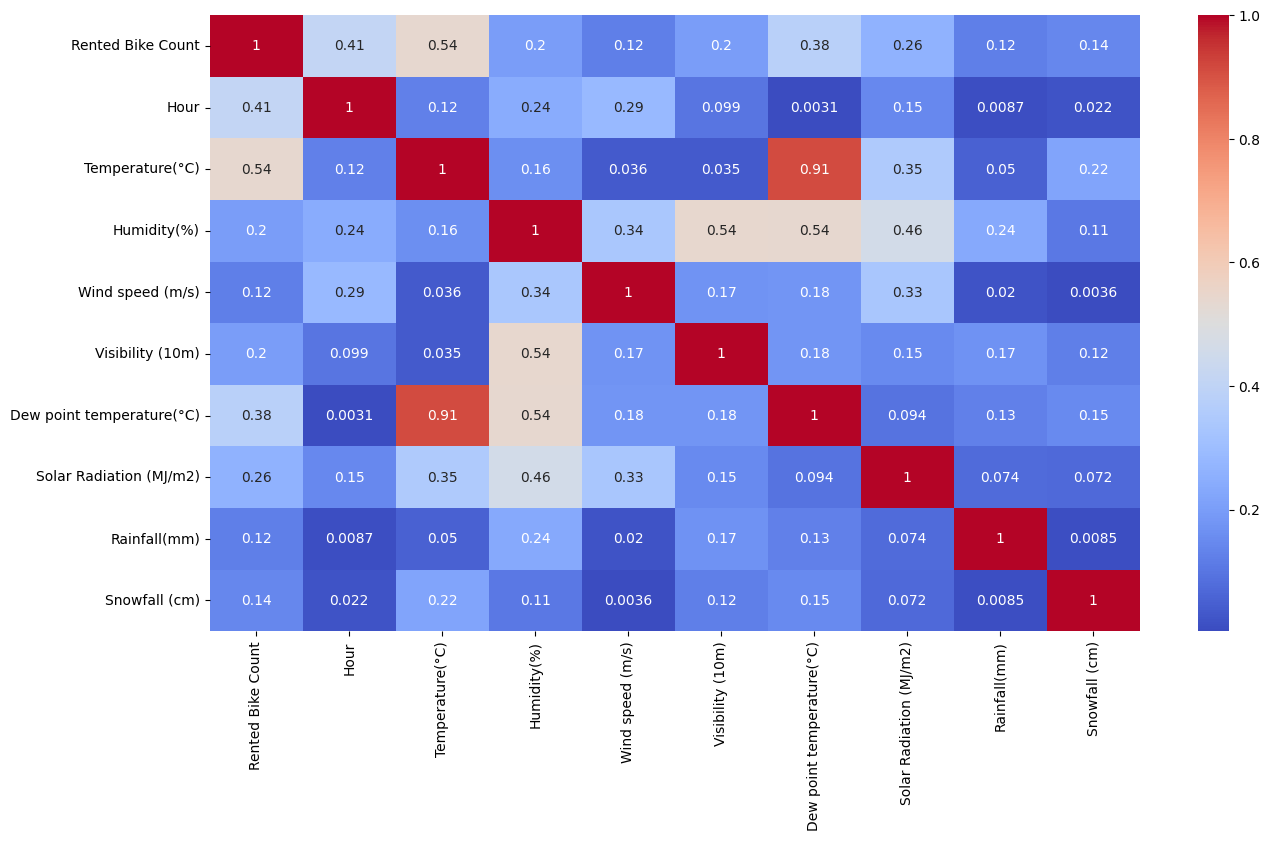

In [17]:
# Correlation
plt.figure(figsize=(15,8))
sns.heatmap(abs(new_df.corr()),annot=True,cmap="coolwarm")

We can observe that the features Temperature and Dew Point Temperature exhibit a high correlation. Therefore we will drop the column Dew Point temperature to prevent multicollinearity.

In [18]:
#Drop column
new_df.drop("Dew point temperature(°C)",axis=1,inplace=True)

## **VIF analysis**

We use VIF analysis to check the level of collinearity among the independent and dependent variables.

Detecting multicollinearity is essential because it reduces the statistical significance of the independent variables.

In [19]:

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
#Function calling
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


VIF value is under 5. Therefore we assume that the multicollinearity between the independent variables is negligible.

### **What is the demand for rental bikes during different hours of the day?**

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

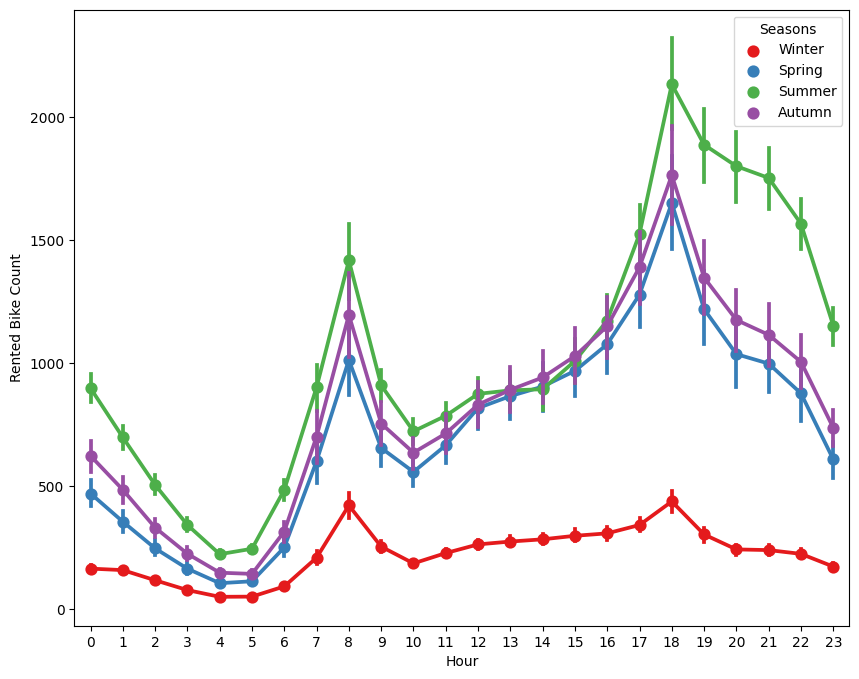

In [21]:
plt.figure(figsize=(10,8))
sns.pointplot(x='Hour',y='Rented Bike Count',data=new_df,palette='Set1',hue='Seasons')



*   People prefer to hire bikes during rush hour, as seen by the sharp increase in
rentals from 6:00 am to 8:00 am and 10-am to 6pm.
*  We can claim that there is a lot of high demand at the opening and closing hours of offices because it is apparent that demand increases steadily at 10 a.m.

*  After 10:00 AM and through 6:00 PM, there is a steady increase in the demand for rental bikes.
*   Early hours(1:00 AM to 6:00 AM) is when there is least demand for bicycles.

*   Regardless,of the seasons, this has been the general trend noticed.


## **EDA on categorical variables**

In [22]:
#Obtaining the data type of features
new_df.dtypes

Date                        object
Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons                     object
Holiday                     object
Functioning Day             object
dtype: object

In [23]:
#Obtaining the categorical variables
categorical_variable=new_df.describe(include=["object"]).columns.tolist()
print("Categorical variables are", categorical_variable)

Categorical variables are ['Date', 'Seasons', 'Holiday', 'Functioning Day']


In [24]:
#Group by "Holiday" on sum
new_df.groupby("Holiday")["Rented Bike Count"].sum()

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [25]:
#Group by "Functioning Day" on sum
new_df.groupby("Functioning Day")["Rented Bike Count"].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

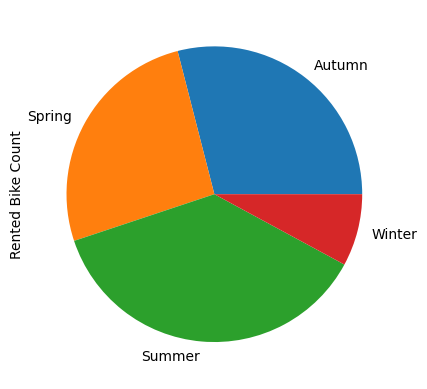

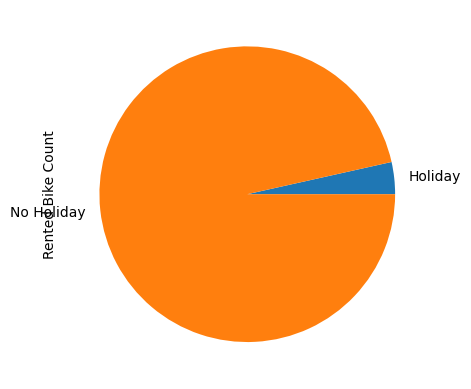

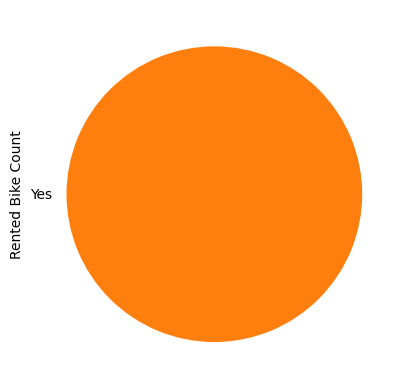

In [26]:
#Plotting for categorical variables
for col in categorical_variable:
  if col not in ['Date']:
    new_df.groupby([col])["Rented Bike Count"].sum().plot.pie()
    plt.show()


We can observe from the above chart that due to high snowfall and less temperature, the number of rented bike count is deficient in the winters compared to summer and spring.

People use rental bikes primarily for short-distance travel like traveling to school or work. That's why the percentage of rented bike count is lesser on a holy day.

Since bikes are rented only on a functioning day, there is no doubt why the percentage of rented bike count is zero on a non-functioning day.

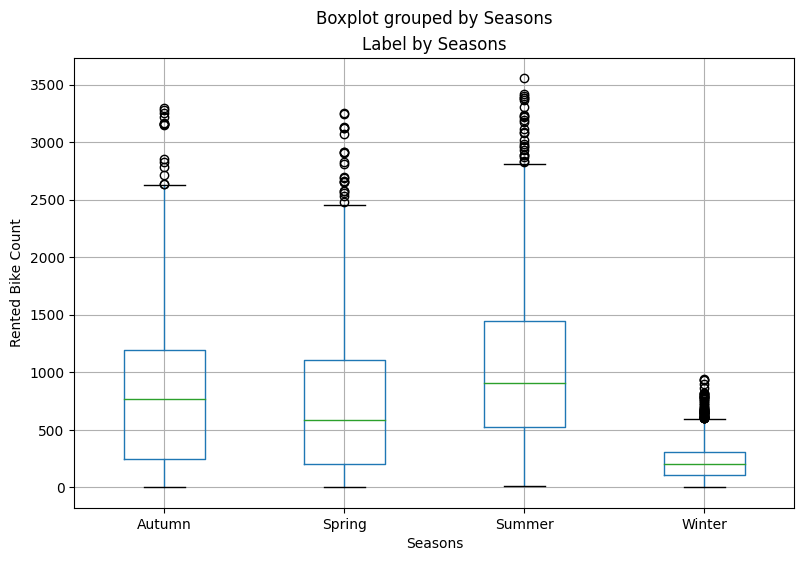

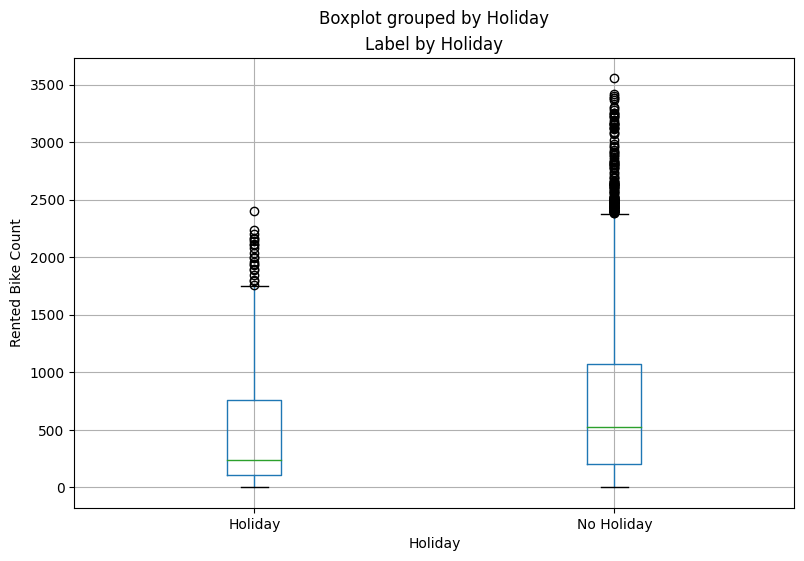

In [27]:
#Obtain boxplot
for col in categorical_variable:
  if col not in ["Date","Functioning Day"]:
      fig = plt.figure(figsize=(9, 6))
      ax = fig.gca()
      new_df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
      ax.set_title('Label by ' + col)
      ax.set_ylabel('Rented Bike Count')
plt.show()

### **Lable Encoding**

In [28]:
#Label encoding
label={'Holiday':{'Holiday':1,'No Holiday':0},'Functioning Day':{'Yes':0,'No':1}}
new_df=new_df.replace(label)

In [29]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'seasons'.
new_df['Seasons']= label_encoder.fit_transform(df['Seasons'])

#Obtain unique elements in "Seasons"
new_df['Seasons'].unique()

array([3, 1, 2, 0])

## **Selecting Independent Variables:**

In [30]:
new_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [31]:
#Drop date column
new_df.drop(["Date"],axis=1,inplace=True)

In [32]:
#List of important features
features=new_df.describe(include="all").columns.tolist()

In [33]:
print("Important features after features engineering are:",features)

Important features after features engineering are: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


# **Train test split**

In [34]:
#Defining independent variables
indipendend_var=[elem for elem in features if elem not in ['Rented Bike Count']]


In [35]:
#Defining dependent variable
dependent_var=["Rented Bike Count"]

In [36]:
#independent variables
X = new_df[indipendend_var]


In [37]:
#Applying log1p transformation to the dependent variable
y = np.log1p(df['Rented Bike Count'])

In [38]:
y

0       5.541264
1       5.323010
2       5.159055
3       4.682131
4       4.369448
          ...   
8755    6.911747
8756    6.639876
8757    6.543912
8758    6.569481
8759    6.371612
Name: Rented Bike Count, Length: 8760, dtype: float64

## **Train test split and standardization**

In [39]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 11)
(1752, 11)


In [40]:

from sklearn.preprocessing import *
#Scaling the features
#Creating an instance of the scaler
scaler=StandardScaler()
#Fitting scaler
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.50774916 -0.38874606  0.18996015 ...  1.35175828 -0.23202281
  -0.18254726]
 [ 0.9408263   1.29850393 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 [-0.06968702  1.42379477 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 ...
 [-0.06968702  1.05627497 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 [-1.65763652 -0.38039334  0.0423343  ... -0.44001816 -0.23202281
  -0.18254726]
 [ 1.22954439 -0.48062601  1.22334111 ... -0.44001816 -0.23202281
  -0.18254726]]
[[-1.22455939 -0.17992799  0.73125494 ... -0.44001816 -0.23202281
  -0.18254726]
 [-1.36891843  0.73887151  0.97729803 ... -1.33590637 -0.23202281
  -0.18254726]
 [ 0.79646725 -0.7729713   0.337586   ...  1.35175828 -0.23202281
  -0.18254726]
 ...
 [-1.65763652 -0.2551025   1.37096697 ... -0.44001816 -0.23202281
  -0.18254726]
 [ 1.51826248 -0.04628443  0.337586   ... -1.33590637 -0.23202281
  -0.18254726]
 [-1.65763652 -0.21333888  0.43600324 ... -1.33590637 -0.23202281
  -0.18254726]]


##**Defining functions to get evaluation metric's scores and feature importance**

In [41]:
def regression_results(actual_y, pred_y, X):

    '''This function takes actual and predicted value of target transform tem back and return scores of evaluation metrics'''

    #Reverse transforming the predicted output
    y_true = np.expm1(actual_y)
    y_pred = np.expm1(pred_y)

    # Calculating regression metrics

    MAE = mean_absolute_error(y_true,y_pred)

    MSE  = mean_squared_error(y_true,y_pred)

    RMSE = np.sqrt(MSE)

    r2 = r2_score(y_true,y_pred)

    adj_r2 = 1-(1-r2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))

    return(round(MAE,2),round(MSE,2),round(RMSE,2),round(r2,2),round(adj_r2,2))


In [42]:
def performance(model):

  '''This function takes model as input and return different evaluation metrics' score as dataframe'''

  #Doing prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #Calling the function regression_results
  train = regression_results(y_train, y_train_pred, X_train)
  test = regression_results(y_test, y_test_pred, X_test)

  # Storing the scores
  score = {'Metric' : ['MAE', 'MSE', 'RMSE', 'r2', "adj_r2"],
          'Train Score' : [train[0], train[1], train[2], train[3], train[4]],
          "Test Score": [test[0],test[1],test[2],test[3],test[4]]}

  # Create DataFrame
  df = pd.DataFrame(score)
  df.name = model
  return(df)

In [43]:
def feature_impo(model):
  '''This function takes instance of linear model as input and and return feature importance graph '''
  #Store the coefficients of the model into a dataframe
  coefs = pd.DataFrame(
    model.coef_,
    columns=['Coefficients'], index=indipendend_var)
  #Plot importance graph
  coefs.plot(kind='barh', figsize=(9, 7))
  plt.title('Model')
  plt.axvline(x=0, color='.5')
  plt.subplots_adjust(left=.3)

  plt.show()

In [44]:
def feature_importance(model):
  '''This function takes instance of ensemble model as input and returns the feature importance'''
  #Listing features
  features = indipendend_var
  #storing feature importance
  importances = model.feature_importances_
  indices = np.argsort(importances)
  #Plot the feature importance
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

# **Training Models:**

#**Linear Regression**

In [45]:
#Loading libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [46]:
#Fitting the model
reg = LinearRegression().fit(X_train, y_train)

In [47]:
#Model score
print("The model score is:",reg.score(X_train, y_train))

The model score is: 0.7816077753951596


In [48]:
#Obtaining the coefficients
reg.coef_

array([ 0.27344724,  0.60169029, -0.3241732 , -0.02130196,  0.02977144,
       -0.04217236, -0.24248698, -0.01032788, -0.22272405, -0.0818845 ,
       -1.14792033])

In [49]:
#Get length of coefficients
len(reg.coef_)

11

In [50]:
#Obtaining the intercept
print("Intercept of te model is:",reg.intercept_)

Intercept of te model is: 5.903208576573145


In [51]:
#Predicting
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [52]:
#View prediction
y_pred_test

array([5.64606376, 6.28533759, 5.45227601, ..., 5.27503075, 6.79545845,
       5.79869195])

In [53]:
#Storing linear regression evaluation scores
train_result_linear = regression_results(y_train,y_pred_train,X_train)
test_result_linear =  regression_results(y_test,y_pred_test,X_test)

In [54]:
print("MAE, MSE, RMSE, r2 and adjusted r2 are:", train_result_linear)

MAE, MSE, RMSE, r2 and adjusted r2 are: (287.44, 202203.58, 449.67, 0.51, 0.51)


In [55]:
#Calling function
print("Performance of Linear Regression")
performance(reg)

Performance of Linear Regression


,Metric,Train Score,Test Score
0,MAE,287.44,279.07
1,MSE,202203.58,195114.04
2,RMSE,449.67,441.72
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


Linear Regression-Feature Importance


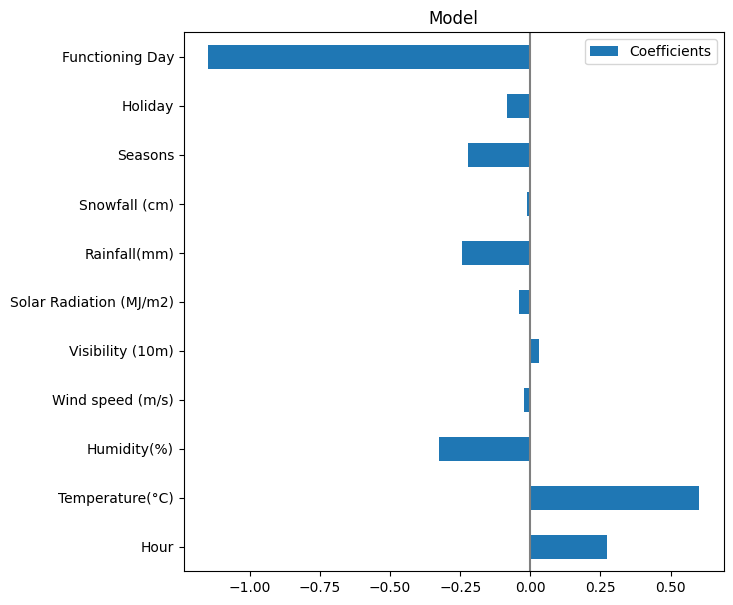

In [56]:
#Calling function
print("Linear Regression-Feature Importance")
feature_impo(reg)

A model is said to be the best model when the R2 score is close to 1 and the MAE is low.

With an r2 score of .53, linear regression fails in terms of accuracy.

#**Residual Analysis**

In [57]:
import plotly.express as px

def residual_plot(actual_y, pred_y,header="dataset"):
  # Residual error  of training Dataset (Actual-Predicted)
  residual_df = pd.DataFrame(actual_y - pred_y)
  residual_df.head()

  # Residual plot for training data
  fig = px.scatter(residual_df)
  fig.update_layout(title_text='Residual plot for {} dataset'.format(header))
  fig.add_hline(y=0)
  fig.show()

In [58]:
residual_plot(y_train, y_pred_train, header="train")

In [59]:
residual_plot(y_test, y_pred_test, header="test")

From above plots we can say that residual errors have constant variance and they have homoscadacity in between them for both train and test data.

This means The plot indicates that the residual errors in the regression model have a consistent spread (constant variance) across the range of predicted values, which is a desirable characteristic known as homoscedasticity. This observation holds true for both the training and testing datasets, suggesting that the model's errors do not systematically change as predictions vary, a positive sign in regression analysis.

#**Lasso Regression**

In [60]:
from sklearn.linear_model import Lasso
#Creating an instance of the model
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
#Fitting the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [61]:
lasso.coef_

array([ 0.27337186,  0.60148173, -0.32387565, -0.02119993,  0.02979608,
       -0.04187141, -0.24241365, -0.01029077, -0.22262542, -0.0817894 ,
       -1.147795  ])

In [62]:
print("Lasso score is :",lasso.score(X_train, y_train))

Lasso score is : 0.7816077182837026


In [63]:
#Prediction
y_pred_lasso = lasso.predict(X_test)

In [64]:
print("Performance of Lasso Regression")
performance(lasso)

Performance of Lasso Regression


,Metric,Train Score,Test Score
0,MAE,287.46,279.09
1,MSE,202234.96,195153.97
2,RMSE,449.71,441.76
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


The performance of Lasso regression is also poor.

#**Lasso Cross Validation**

In [65]:
 #Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.5367512729774678


In [67]:
lasso=lasso_regressor.best_estimator_

In [68]:
y_pred_lasso_test = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

In [69]:
#Storing lasso regression evaluation scores
train_result_lasso = regression_results(y_train,y_pred_lasso_train,X_train)
test_result_lasso =  regression_results(y_test,y_pred_lasso_test,X_test)

In [70]:
print("Scores of Lasso after cross-validation and hyperparameter tuning")
performance(lasso)

Scores of Lasso after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,287.44,279.07
1,MSE,202203.58,195114.04
2,RMSE,449.67,441.72
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


Despite the application of cross-validation and hyperparameter tuning, there has been no improvement in Lasso regularization scores.

Lasso Regression - Feature Importance


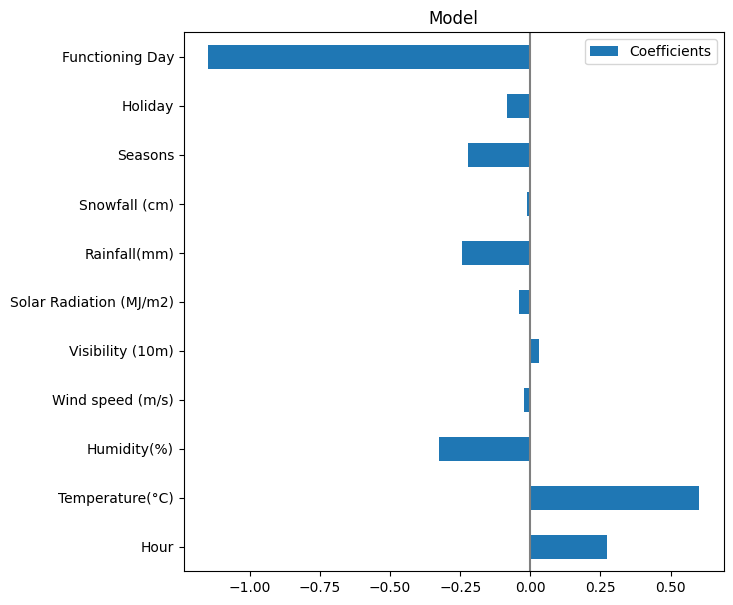

In [71]:
print("Lasso Regression - Feature Importance")
feature_impo(lasso)

#**Ridge Regression**

In [72]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [73]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.5359927444794051


In [74]:
ridge=ridge_regressor.best_estimator_

In [75]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_ridge_train = ridge.predict(X_train)

In [76]:
#Storing ridge regression evaluation scores
train_result_ridge = regression_results(y_train,y_pred_ridge_train,X_train)
test_result_ridge =  regression_results(y_test,y_pred_ridge_test,X_test)

In [77]:
print("Performance of Ridge Regression")
performance(ridge)


Performance of Ridge Regression


,Metric,Train Score,Test Score
0,MAE,287.45,279.08
1,MSE,202213.50,195127.98
2,RMSE,449.68,441.73
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


The performance of ridge regression is also poor.

Ridge Regression-Feature Importance


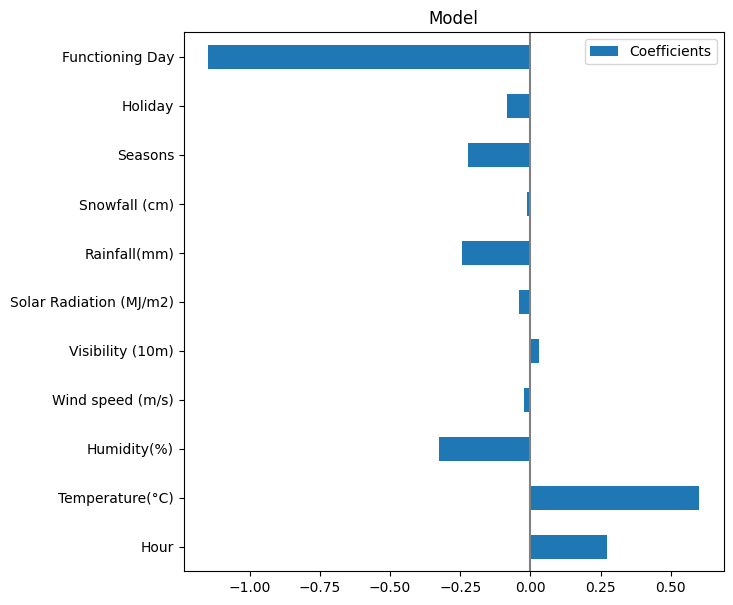

In [78]:
print("Ridge Regression-Feature Importance")
feature_impo(ridge)

We can see that the r2 score of linear regression is very poor. Despite regularization, the score did not improve.

One reason for this is that regulation helps to fix overfitting, but our model is not overfitted. Since R2 scores are poor, we can clearly conclude that linear regression fails to be effective in our problem.

So we will switch to ensemble methods.

# **Random Forest Regressor**


The first ensemble model that applied is Random forest.

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
#RandomForest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)

In [81]:
print("Scores of Random Forest")
performance(model_rf)

Scores of Random Forest


,Metric,Train Score,Test Score
0,MAE,54.36,141.76
1,MSE,9272.02,57092.08
2,RMSE,96.29,238.94
3,r2,0.98,0.86
4,adj_r2,0.98,0.86


We can see a drastic improvement in the r2 score compared to linear regression. Predicting using random model regression gives an r2 score of .98.

## **Random Forest cross validation**

In [82]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [83]:
print("The best fit alpha value is found out to be :",param_dict)

The best fit alpha value is found out to be : {'n_estimators': [50, 80, 100], 'max_depth': [4, 6, 8], 'min_samples_split': [50, 100, 150], 'min_samples_leaf': [40, 50]}


In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = RandomizedSearchCV(estimator=rf_model,scoring="neg_mean_squared_error",
                       param_distributions = param_dict,
                       cv = 5, verbose=2)
#Fitting model
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=6,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [86]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=50)

In [87]:
rf_optimal_model = rf_grid.best_estimator_

In [88]:
rf_grid.best_params_

{'n_estimators': 50,
 'min_samples_split': 50,
 'min_samples_leaf': 40,
 'max_depth': 8}

In [89]:

# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

# Get the probabilities on train and test
y_pred_train_rf = rf_optimal_model.predict(X_train)
y_pred_test_rf = rf_optimal_model.predict(X_test)

In [90]:
#Storing random forest regression evaluation scores
train_result_rf = regression_results(y_train,y_pred_train_rf,X_train)
test_result_rf =  regression_results(y_test,y_pred_test_rf,X_test)

In [91]:
test_class_preds

array([5.39143287, 6.17176182, 5.76599861, ..., 6.23702726, 6.95456907,
       6.27617988])

In [92]:
print("random forest best score",rf_grid.best_score_)

random forest best score -0.2552300665333195


In [93]:
print("performance of Random Forest after cross validation and hyperparameter tuning")
performance(rf_optimal_model)

performance of Random Forest after cross validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,174.48,178.45
1,MSE,82807.60,87977.57
2,RMSE,287.76,296.61
3,r2,0.80,0.79
4,adj_r2,0.80,0.79


Random Forest train and test r2 scores were dissimilar before applying cross-validation and hyperparameter tuning but are now almost identical.

Random Forest-Feature Importance


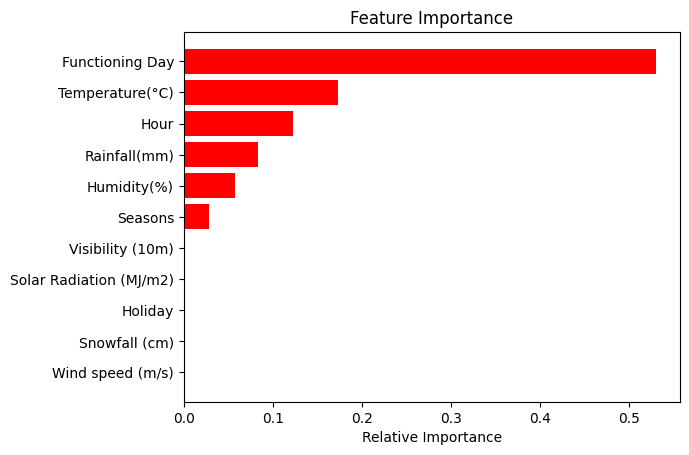

In [94]:
print("Random Forest-Feature Importance")
feature_importance(rf_optimal_model)

In random forest the feature 'functioning day' has the highest impact on the dependent variable "Rented Bike count". The second most important feature is "Temperature".

# **GBM**

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
# Hyperparameter tuning

gbm = GradientBoostingRegressor()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbm_model = GridSearchCV(gbm, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
gbm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [97]:
gbm_model.predict(X_test)


array([5.54881409, 6.30420496, 5.8550239 , ..., 6.02556502, 6.93637844,
       6.32224064])

In [98]:
print("Evaluation metrics for GBM")
performance(gbm_model)

Evaluation metrics for GBM


,Metric,Train Score,Test Score
0,MAE,196.04,196.02
1,MSE,104082.42,108884.17
2,RMSE,322.62,329.98
3,r2,0.75,0.74
4,adj_r2,0.75,0.74


The train and test r2 scores of a gbm model are almost identical.

# **GBM CROSS VALIDATION**

In [99]:
# Grid search
gbm = GradientBoostingRegressor()

gbm_grid = RandomizedSearchCV(estimator=gbm,scoring="neg_mean_squared_error",
                       param_distributions = param_dict,
                       cv = 5, verbose=2)

gbm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   1.7s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=8

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [100]:
gbm_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=80)

In [101]:
gbm_optimal_model = gbm_grid.best_estimator_

In [102]:
gbm_grid.best_params_


{'n_estimators': 80,
 'min_samples_split': 50,
 'min_samples_leaf': 40,
 'max_depth': 8}

In [103]:
# Making predictions on train and test data

train_class_preds = gbm_optimal_model.predict(X_train)
test_class_preds = gbm_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = gbm_optimal_model.predict(X_train)
test_preds = gbm_optimal_model.predict(X_test)

In [104]:
y_pred_train_gbm =  gbm_optimal_model.predict(X_train)
y_pred_test_gbm  = gbm_optimal_model.predict(X_test)

In [105]:
#Storing gradient boosting machine evaluation scores
train_result_gbm = regression_results(y_train,y_pred_train_gbm,X_train)
test_result_gbm =  regression_results(y_test,y_pred_test_gbm,X_test)

In [106]:
print("Scores of GBM after cross-validation and hyperparameter tuning")
performance(gbm_optimal_model)

Scores of GBM after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,127.27,143.68
1,MSE,43661.96,57916.74
2,RMSE,208.95,240.66
3,r2,0.89,0.86
4,adj_r2,0.89,0.86


After the cross-validation and hyperparameter tuning we can see a significant improvement in GBM's r2 score.

GBM-Feature Importance


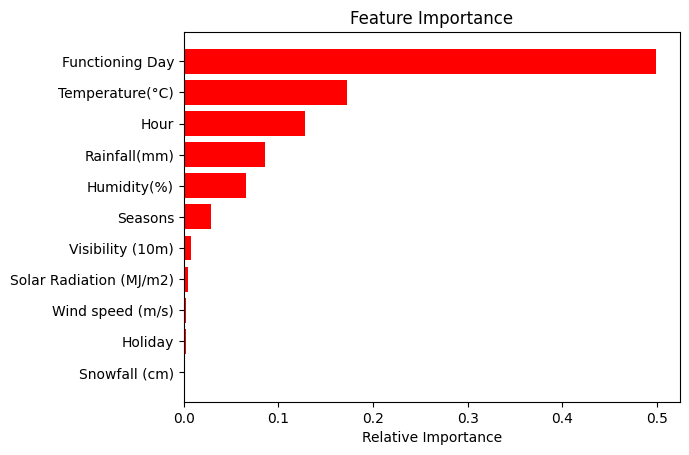

In [107]:
print("GBM-Feature Importance" )
feature_importance(gbm_optimal_model)


In GBM also the feature 'functioning day' has the highest impact on the dependent variable "Rented Bike count" and the second most important feature is "Temperature".

# **XGBoost**

In [108]:
import xgboost as xgb

In [109]:
# Instantiation
xgb = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 1000, seed = 123)

# Fitting the model
xgb.fit(X_train, y_train)

# Predict the model
pred = xgb.predict(X_test)

In [110]:
print("Evaluation metrics for XGBoost")
performance(xgb)

Evaluation metrics for XGBoost


,Metric,Train Score,Test Score
0,MAE,4.53,148.05
1,MSE,84.39,61215.08
2,RMSE,9.19,247.42
3,r2,1.00,0.85
4,adj_r2,1.00,0.85


XGBoost gives a better r2 score than other models.

In [111]:
# run randomized search
from sklearn.model_selection import cross_val_score
cross_val_score(xgb,X_train,y_train,scoring='r2')

array([0.92136148, 0.9199594 , 0.93046324, 0.91213765, 0.92742218])

# **XGB CROSS VALIDATION**

In [112]:
import xgboost as xgboost

In [113]:
params = {
    'n_estimators':[500],
    'max_depth': [4,6,8],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'eval_metric': ['rmse']}

xgb = xgboost.XGBRegressor(nthread=-1)

n_iter_search = 100
xgb_grid = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

xgb_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          nthread=-1, num_parallel_tree=None, ...),
                   n_iter=100,
                   param_distributions={'eval_metric': ['rmse'],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [500],
                                        'objective': ['reg:squarederror',
                                                      'reg:tweedie']},
                   scoring='neg_mean_squared_error')

In [114]:
xgb_grid.best_params_


{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'max_depth': 8,
 'eval_metric': 'rmse'}

In [115]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)

In [116]:
xgb_optimal_model=xgb_grid.best_estimator_

In [117]:
# Making predictions on train and test data

train_class_preds = xgb_optimal_model.predict(X_train)
test_class_preds = xgb_optimal_model.predict(X_test)


# Get the probabilities on train and test
y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_test_xgb = xgb_optimal_model.predict(X_test)


In [118]:
#Storing xgboost regression evaluation scores
train_result_xgb = regression_results(y_train,y_pred_train_xgb,X_train)
test_result_xgb =  regression_results(y_test,y_pred_test_xgb,X_test)

In [119]:
print("Evaluation metrics for XGBoost after cross-validation and hyperparameter tuning")
performance(xgb_optimal_model)

Evaluation metrics for XGBoost after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,1.41,141.17
1,MSE,9.07,58568.68
2,RMSE,3.01,242.01
3,r2,1.00,0.86
4,adj_r2,1.00,0.86


XGBoost-Feature Importance


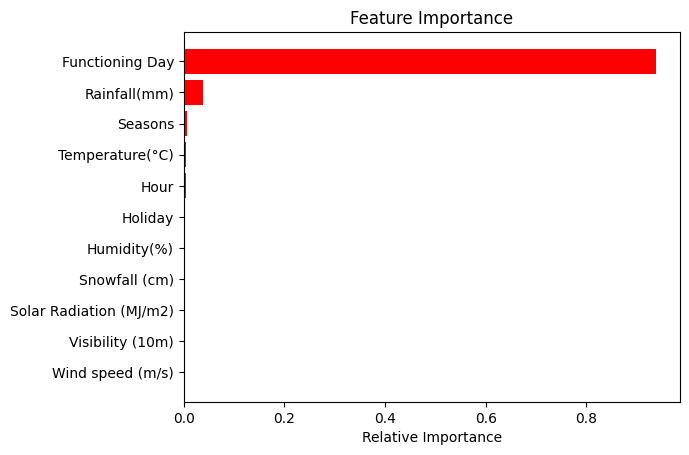

In [120]:
print("XGBoost-Feature Importance")
feature_importance(xgb_optimal_model)

In GBM also the feature 'functioning day' has the highest impact on the dependent variable "Rented Bike count" and the second most important feature here is "Rainfall".

## Creating comparison data frame of scores of different models after cross-validation and hyperparameter tuning.

In [121]:
regresser = ['Linear ', 'Lasso ', 'Ridge', 'Random Forest CV', 'GBMCV' , 'XGboost CV']
#Seperating evaluation scores
train_MAE = [train_result_linear[0],train_result_lasso[0],train_result_ridge[0],train_result_rf[0],train_result_gbm[0],train_result_xgb[0]]
test_MAE = [test_result_linear[0],test_result_lasso[0],test_result_ridge[0],test_result_rf[0],test_result_gbm[0],test_result_xgb[0]]

train_MSE = [train_result_linear[1],train_result_lasso[1],train_result_ridge[1],train_result_rf[1],train_result_gbm[1],train_result_xgb[1]]
test_MSE = [test_result_linear[1],test_result_lasso[1],test_result_ridge[1],test_result_rf[1],test_result_gbm[1],test_result_xgb[1]]

train_RMSE = [train_result_linear[2],train_result_lasso[2],train_result_ridge[2],train_result_rf[2],train_result_gbm[2],train_result_xgb[2]]
test_RMSE = [test_result_linear[2],test_result_lasso[2],test_result_ridge[2],test_result_rf[2],test_result_gbm[2],test_result_xgb[2]]

train_r2 = [train_result_linear[3],train_result_lasso[3],train_result_ridge[3],train_result_rf[3],train_result_gbm[3],train_result_xgb[3]]
test_r2 = [test_result_linear[3],test_result_lasso[3],test_result_ridge[3],test_result_rf[3],test_result_gbm[3],test_result_xgb[3]]

train_adj_r2 = [train_result_linear[4],train_result_lasso[4],train_result_ridge[4],train_result_rf[4],train_result_gbm[4],train_result_xgb[4]]
test_adj_r2 = [test_result_linear[4],test_result_lasso[4],test_result_ridge[4],test_result_rf[4],test_result_gbm[4],test_result_xgb[4]]


In [122]:

#Creating a dataframe of evaluation scores of all te models after cross validation and hyper parameter tuning
evalation_matrix=pd.DataFrame({'Model':regresser, 'Train MAE': train_MAE, 'Test MAE': test_MAE, 'Train MSE': train_MSE, 'Test MSE': test_MSE, 'Train RMSE': train_RMSE, 'Test RMSE': test_RMSE,
              'Train r2': train_r2, 'Test r2': test_r2, 'Train adj r2': train_adj_r2, 'Test adj r2': test_adj_r2})
print("Evaluation metrics for different algorithms:")
evalation_matrix

Evaluation metrics for different algorithms:


,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train r2,Test r2,Train adj r2,Test adj r2
0,Linear,287.44,279.07,202203.58,195114.04,449.67,441.72,0.51,0.53,0.51,0.53
1,Lasso,287.44,279.07,202203.58,195114.04,449.67,441.72,0.51,0.53,0.51,0.53
2,Ridge,287.45,279.08,202213.50,195127.98,449.68,441.73,0.51,0.53,0.51,0.53
3,Random Forest CV,174.48,178.45,82807.60,87977.57,287.76,296.61,0.80,0.79,0.80,0.79
4,GBMCV,127.27,143.68,43661.96,57916.74,208.95,240.66,0.89,0.86,0.89,0.86
5,XGboost CV,1.41,141.17,9.07,58568.68,3.01,242.01,1.00,0.86,1.00,0.86


* R2 score in Linear Regression is 0.51 for the train data and 0.53 for the test data. Thus the Linear Regression model fails in this case.
* Comparing the R2 score of all the models, one can see that XGBoost performs better than other models.
* Gradient Boosting Machine has a test accuracy of 86%, making it the second-best model.
* Random Forest is also found to perform well on the data.


# **Conclusion:**


The project focuses on predicting bike sharing demand using the Seoul dataset.
Of the different models used for this issue, the XGBoost performs better than the other models, with a train R2 score of 0.96 and a test R2 score of 0.87. XGboost gives the least MAE among the models. The most important features for predicting the dependent variable (number of hired bikes) for XGBoost are functioning day, rainfall, season, and temperature.
This project will be helpful for the company to predict the hourly bike demand and enrich the user experience.

# ***How it will help to Bussiness***

1. **Business Stakeholders (e.g., Managers, Executives):**
   - **Decision-Making:** The project can provide insights into the factors that influence a particular outcome or target variable. This information can guide strategic decisions, such as resource allocation, marketing strategies, or product development.
   - **Performance Metrics:** Business stakeholders can assess the performance of different models in predicting outcomes, helping them understand the potential impact of various initiatives or changes.

2. **Data Analysts and Data Scientists:**
   - **Model Development:** Data professionals can benefit from the project as it involves the development of machine learning models using different algorithms. They can gain insights into model selection, hyperparameter tuning, and evaluation.
   - **Feature Importance:** Understanding feature importance can help data scientists identify which factors are most influential in predicting the target variable, aiding in feature engineering and model improvement.

3. **IT and Engineering Teams:**
   - **Integration:** If the project leads to a production-ready model, IT and engineering teams can integrate this model into existing systems or applications to automate decision-making processes.
   - **Scalability:** The project may uncover scalability challenges when deploying models in production, prompting IT teams to prepare for increased computational demands.

4. **Customers or End Users:**
   - **Improved Services:** Depending on the project's domain, stakeholders such as customers or end users may benefit from improved services or products. For example, if the project is related to e-commerce, users may experience better product recommendations.

5. **Regulatory Bodies (if applicable):**
   - **Compliance:** In regulated industries like healthcare or finance, the project may ensure that decisions are made in compliance with regulations and ethical standards.

6. **Investors and Shareholders (if applicable):**
   - **Return on Investment (ROI):** Investors and shareholders may assess the project's ROI based on its potential impact on revenue, cost reduction, or customer satisfaction.

7. **Research and Development Teams (if applicable):**
   - **Innovation:** The project may lead to innovation in processes, products, or services, driving the R&D agenda forward.

8. **Marketing and Sales Teams (if applicable):**
   - **Targeted Marketing:** Insights from the project can enable marketing and sales teams to target specific customer segments more effectively, leading to improved conversion rates and sales.


In summary, this project can be highly beneficial for stakeholders across different departments and functions within an organization. It can provide actionable insights, improve decision-making, optimize processes, and ultimately contribute to the achievement of business objectives and customer satisfaction. However, the specific benefits will depend on the industry, objectives, and context of the project.